# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a useful technique for reducing the number of dimensions in high-dimensional data. This is useful in a number of ways in machine learning. In the first example, we turn a 2D dataset into a 1D dataset.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(-2.729271205627196, 2.570274439335261, -0.9326181575178751, 1.004413830229183)

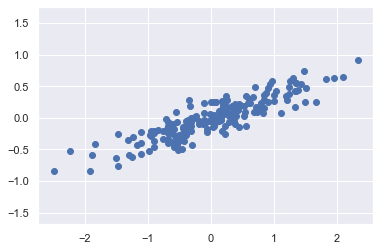

In [2]:
# Generate random data points that roughly form a line
import numpy as np

rng = np.random.RandomState(1)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')

In [3]:
# Find two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

(-2.729271205627196, 2.570274439335261, -0.9326181575178751, 1.004413830229183)

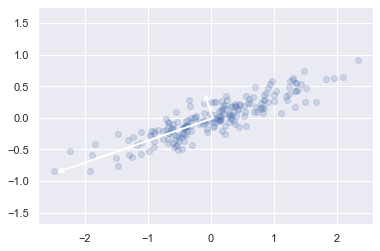

In [4]:
# Plot the principal components
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    props = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=props)
    
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)

for len, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(len)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')

In [5]:
# Use PCA to reduce two dimensions to one while retaining most of the information
pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)

(-2.7311582267664374,
 2.6099018832593317,
 -0.9672765706389316,
 1.006064230853995)

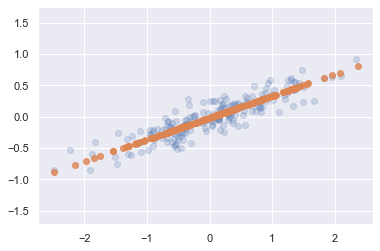

In [6]:
# Plot the results
x_new = pca.inverse_transform(x_pca)
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.8)
plt.axis('equal')

The reduced dataset retains most of the information of the original, but it has just half the dimensions.

# PCA for noise reduction

PCA is is also useful for filtering noise from data. The basic approach is to PCA-transform the dataset, and then perform an inverse transform. Here we demonstrate by artificially adding noise to the handwritten-digits dataset included with scikit-learn.

In [7]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [8]:
# Examine the first digit
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

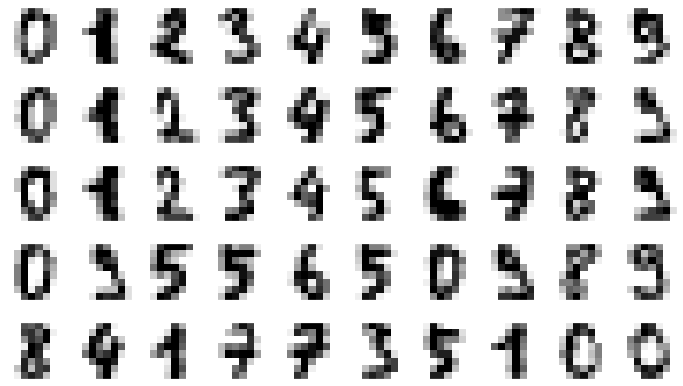

In [9]:
# Plot the first 50 images and show the corresponding labels
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)

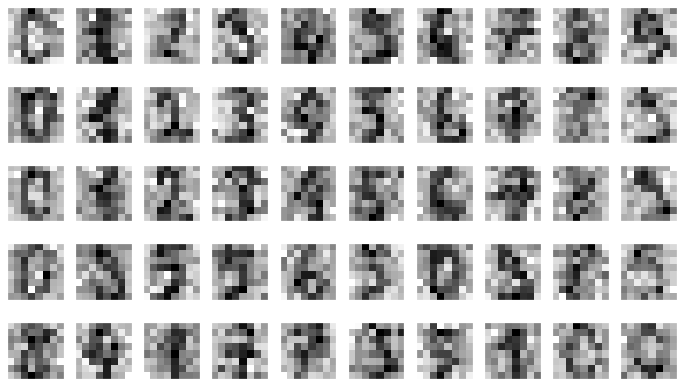

In [10]:
# Introduce random noise to the dataset and plot the results
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(noisy[i].reshape(8, 8), cmap=plt.cm.gray_r)

In [11]:
# Use PCA to reduce the number of dimensions
pca = PCA(0.5, random_state=0).fit(noisy)
pca.n_components_

12

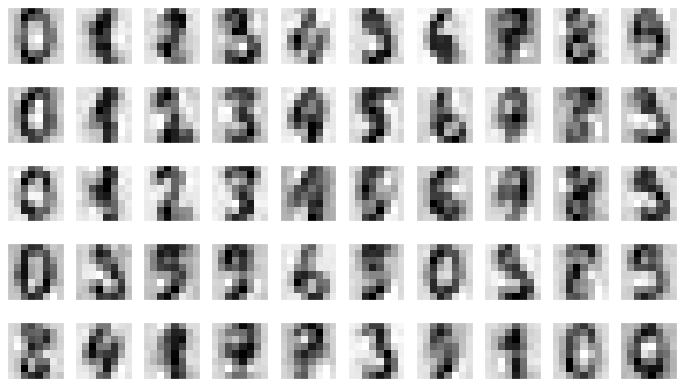

In [12]:
# Reconstruct the dataset from the reduced version
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(filtered[i].reshape(8, 8), cmap=plt.cm.gray_r)

The reconstructred dataset isn't quite as clean as the original, but it's clean enough that you can make out most of the numbers.

## PCA with facial images

One of the more interesting ways to demonstrate that PCA can reduce the dimensions of a dataset while retaining most of the information is to apply it to the Labeled Faces in the Wild (LFW) dataset. We'll first load the dataset and reduce the number of dimensions by 95%. Then we'll invert the PCA transform to visualize how much of the original information was lost.

In [13]:
# Begin by loading a subset of the faces in the LFW dataset
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


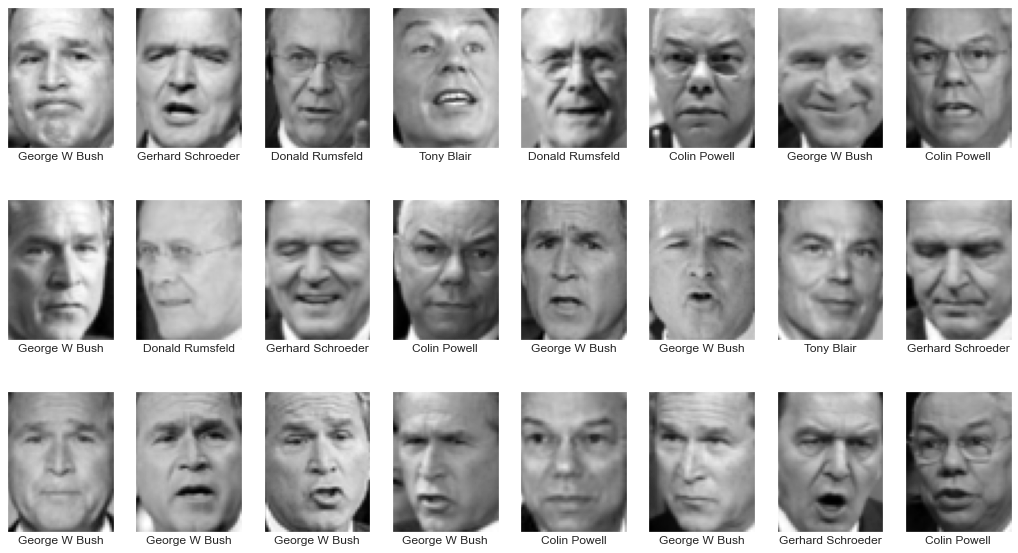

In [14]:
# Plot the first 24 images in the dataset along with their labels
fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [15]:
# Now reduce 2,914 dimensions (62 x 47) to 150 using PCA and invert the transform
pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=0)
transformed = pca.fit_transform(faces.data)
restored = pca.inverse_transform(transformed).reshape(1140, 62, 47)

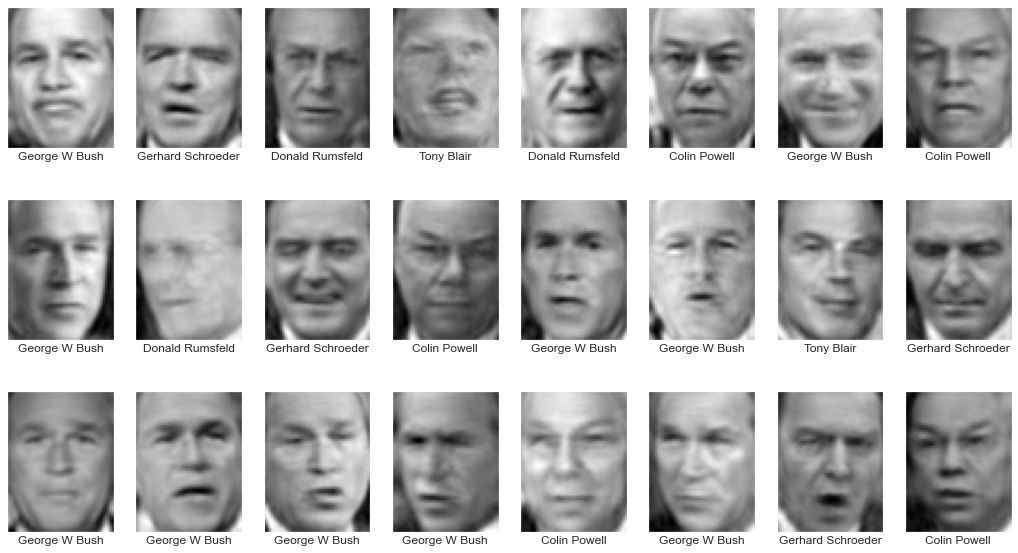

In [16]:
# Show the restored facial images
fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(restored[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

Compare the before and after images. Does it look as if 95% of the information was lost?